<h1>EDA METADATA

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leemos el archivo y creamos un df para poder manipular los datos

In [2]:

# Define the directory containing the JSON files
directory = r'E:\Documentos\EDAGoogle\Google Maps\metadata-sitios'

# Initialize an empty list to hold DataFrames
dfs = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        file_path = os.path.join(directory, filename)
        # Read each JSON file
        df = pd.read_json(file_path, lines=True)
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
combined_df.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


Checamos las columnas y sus nombres

In [4]:
combined_df.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')

Checamos la cantidad de nuestros datos con duplicados

In [5]:
combined_df.count()

name                3024974
address             2944500
gmap_id             3025011
description          254289
latitude            3025011
longitude           3025011
category            3007592
avg_rating          3025011
num_of_reviews      3025011
price                275203
hours               2237606
MISC                2334177
state               2278556
relative_results    2729953
url                 3025011
dtype: int64

In [3]:
# Convert list columns to a string representation to handle duplicates
for col in combined_df.columns:
    if combined_df[col].apply(lambda x: isinstance(x, list)).any():
        combined_df[col] = combined_df[col].apply(lambda x: str(x) if isinstance(x, list) else x)


In [4]:
for col in combined_df.columns:
    combined_df[col] = combined_df[col].apply(lambda x: str(x) if isinstance(x, (list, dict)) else x)


In [5]:
combined_df.drop_duplicates(inplace=True)

Checamos la cantidad de nuestros datos sin duplicados

In [9]:
combined_df.count()

name                2998391
address             2918908
gmap_id             2998428
description          253016
latitude            2998428
longitude           2998428
category            2981245
avg_rating          2998428
num_of_reviews      2998428
price                273918
hours               2218915
MISC                2315380
state               2259570
relative_results    2706972
url                 2998428
dtype: int64

Checamos la informacion general de nuestro dataframe

In [10]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998428 entries, 0 to 3025010
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   description       object 
 4   latitude          float64
 5   longitude         float64
 6   category          object 
 7   avg_rating        float64
 8   num_of_reviews    int64  
 9   price             object 
 10  hours             object 
 11  MISC              object 
 12  state             object 
 13  relative_results  object 
 14  url               object 
dtypes: float64(3), int64(1), object(11)
memory usage: 366.0+ MB


Checamos la cantidad de nulos que contiene cada columna

In [19]:
null_percentages = combined_df.isnull().mean() * 100
null_percentages

name                 0.001234
address              2.652056
gmap_id              0.000000
description         91.561712
latitude             0.000000
longitude            0.000000
category             0.573067
avg_rating           0.000000
num_of_reviews       0.000000
price               90.864613
hours               25.997389
MISC                22.780203
state               24.641512
relative_results     9.720293
url                  0.000000
dtype: float64

In [111]:
combined_df["category"]

0                                               ['Pharmacy']
1                                       ['Textile exporter']
2                                      ['Korean restaurant']
3                                           ['Fabric store']
4                                           ['Fabric store']
                                 ...                        
3025006                                ['Restaurant', 'Bar']
3025007                                 ['Trucking company']
3025008                       ['Beauty salon', 'Hair salon']
3025009    ['Truck accessories store', 'Powder coating se...
3025010                                       ['Campground']
Name: category, Length: 2998428, dtype: object

In [112]:
selected_df = combined_df['category'] 

In [113]:
selected_df.dropna(inplace=True)

In [114]:
selected_df = pd.DataFrame(selected_df)
selected_df

,category
0,['Pharmacy']
1,['Textile exporter']
2,['Korean restaurant']
3,['Fabric store']
4,['Fabric store']
...,...
3025006,"['Restaurant', 'Bar']"
3025007,['Trucking company']
3025008,"['Beauty salon', 'Hair salon']"
3025009,"['Truck accessories store', 'Powder coating se..."


Buscamos la cantidad de columnas que contiene Convenience store

In [120]:
# Función para buscar un valor dentro de las listas de una columna
def buscar_valor(df, columna, valor):
    return df[df[columna].apply(lambda x: valor in x)]

# Buscar 'Convenience store'
resultado = buscar_valor(selected_df, 'category', 'Convenience store')
resultado

,category
24,['Convenience store']
141,"['Fuel supplier', 'Convenience store', 'Fast f..."
153,"['Gas station', 'ATM', 'Convenience store']"
221,['Convenience store']
281,"['Drug store', 'Beauty supply store', 'Conveni..."
...,...
2980842,"['Drug store', 'Convenience store', 'Cosmetics..."
2980851,['Convenience store']
2980852,"['Gas station', 'ATM', 'Car wash', 'Convenienc..."
2980962,"['Convenience store', 'Grocery store']"


Distribución de Ratings:

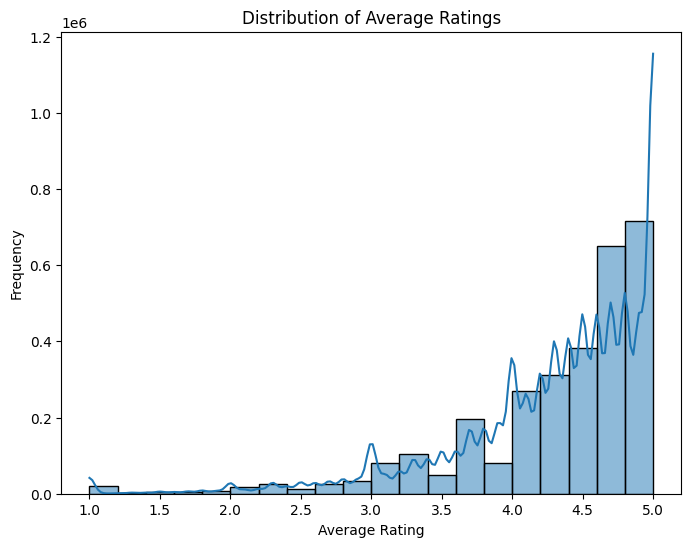

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['avg_rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

Distribución de Reviews:

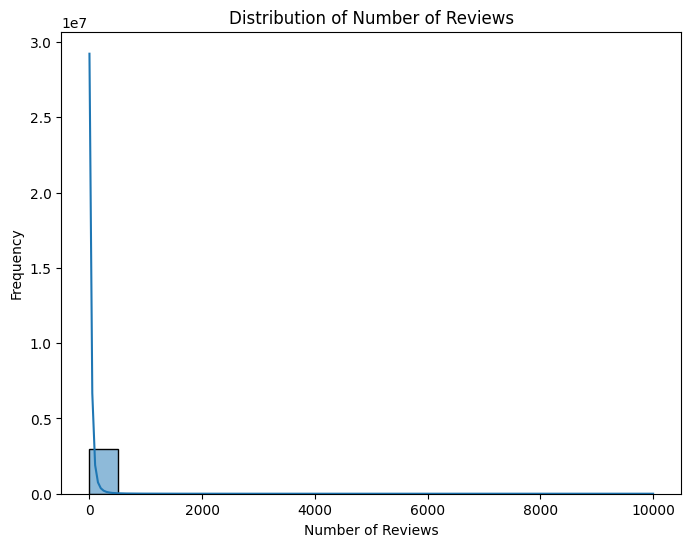

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(combined_df['num_of_reviews'].dropna(), bins=20, kde=True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

Precio Promedio:

In [38]:
combined_df["price"].dropna()

35           $
56          $$
57          $$
59          $$
77          $$
          ... 
3024965    $$$
3024988     $$
3024995     $$
3025005      $
3025006     $$
Name: price, Length: 273918, dtype: object

In [35]:
df = combined_df.copy()

In [36]:
df["price"]

0          None
1          None
2          None
3          None
4          None
           ... 
3025006      $$
3025007    None
3025008    None
3025009    None
3025010    None
Name: price, Length: 2998428, dtype: object

In [39]:
# Convertir el número de '$' a un número entero
df['price'] = df['price'].str.count('\$')

print(df['price'].head())  # Verifica que los valores ahora sean numéricos


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Angel Mariscal\AppData\Local\Temp\ipykernel_7964\3649730683.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].str.count('\$')


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: price, dtype: float64


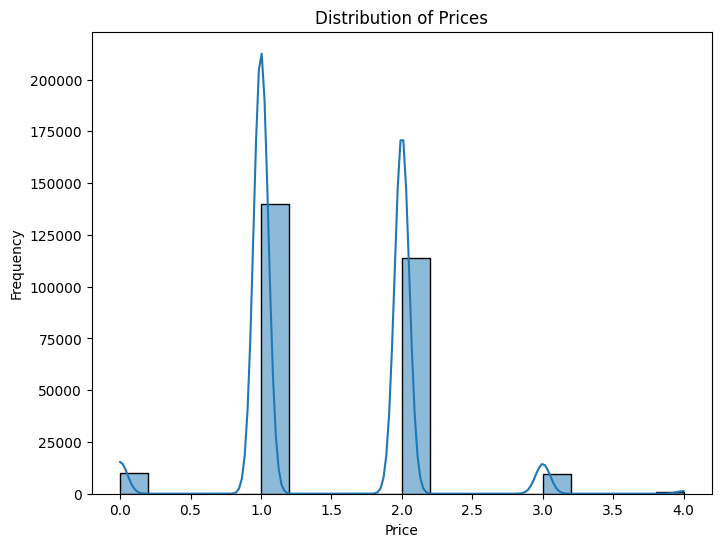

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'].dropna(), bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Ratings por Precio:

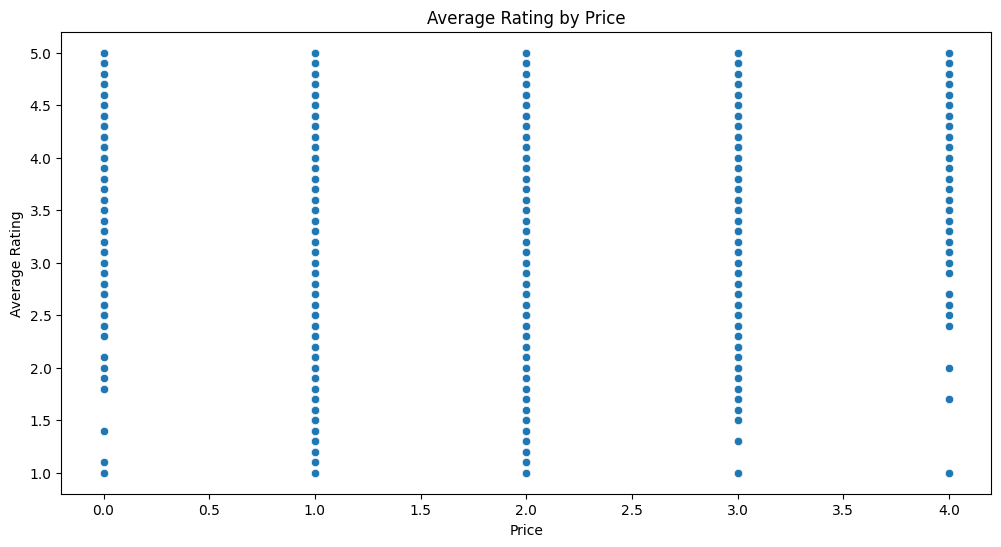

In [41]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='price', y='avg_rating')
plt.title('Average Rating by Price')
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.show()